# Data Science 2
## Numerical analysis - Differential equations

The following material is more elaborately covered in Chapter 7 - *Initial value problems* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).

### Introduction

A [differential equation](https://www.wikiwand.com/en/Differential_equation) is an equation that relates one or more functions and their derivatives. In applications, the functions generally represent measured quantities, the derivatives represent their rates of change, and the differential equation defines a relationship between the two. Such relations are common in biology, for instance when describing changes in the state of biological systems (molecular assemblies, cells or tissues, organisms, populations, ecological communities) that may depend on the current state that the system is in.

The general form of a *first-order differential equation* is $y' = f(x, y)$, where $y' = \frac{dy}{dx}$ and $f(x, y)$ is a given function. The solution of this equation contains an arbitrary constant (the constant of integration). To find this constant, we must know a point on the solution curve; that is, $y$ must be specified at some value of $x$, say at $x = 0$. A numerical solution of differential equations is essentially a table of values $y(x)$ listed at discrete intervals of $x$.

For example, a simplistic model that describes the growth of organisms in a nutrient-rich environment may state that the rate of increase of the population is proportional to the size of the population itself: $y' = k \cdot y$. In this case, $f(x,y) = k\cdot y$ does not depend on $x$ directly. If the initial population size equals $y(0) = y_0$, then this leads to an exact solution $y(t) = y_0 e^{kt}$ describing exponential growth.

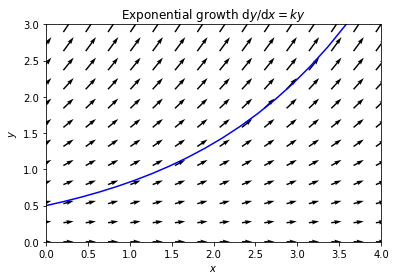

For more complicated models, the equation may be difficult to solve analytically. For example, the growth rate may depend on the availability of nutrients, which may diminish as population grows and which may vary periodically with the yearly seasons. But in such cases numerical methods may still be used.

The variable $y$ may also consist of multiple coordinates, in which case it behaves as a vector. The differential equation then becomes $\boldsymbol{y}' = \boldsymbol{f}(x, \boldsymbol{y})$ with initial condition $\boldsymbol{y}(0) = \boldsymbol{y}_0$. Although this may be much more complicated to solve analytically, the notation as well as the numerical solution remains very similar.

An ordinary differential equation of arbitrary order $n$ can be written as $y^{(n)} = f(x, y, y', \ldots, y^{(n−1)})$. This can always be transformed into $n$ first-order equations. Using the notation $y_0 = y, y_1 = y', y_2 = y'', \ldots, y_{n−1} = y^{(n−1)}$, the equivalent first-order equations are $y_0' = y_1, y_1' = y_2, y_2' = y_3, \ldots, y_n' = f(x, y_0, y_1, \ldots, y_{n−1})$.

### Euler's Method

[Euler's method](https://en.wikipedia.org/wiki/Euler_method) of solution is conceptually simple. The function $f$ can be linearly approximated as $y(x + h) \approx y(x) + y'(x) \cdot h$. By predicting $\boldsymbol{y}$ at $x + h$ from the information available at $x$, it can be used to move the solution forward in steps of $h$.

$$
\boldsymbol{y}(x + h) \approx \boldsymbol{y}(x) + \boldsymbol{f}(\boldsymbol{y}(x), x) \cdot h
$$

Euler's method is seldom used in practice because of its computational inefficiency. Suppressing the truncation error to an acceptable level requires a very small $h$, resulting in many integration steps accompanied by an increase in the roundoff error. The value of the method lies mainly in its simplicity.

**Exercise 1**

Complete the below function `euler` that integrates a differential equation given by some function $\boldsymbol{f}(x, \boldsymbol{y})$ over the interval from `x0` to `x1` in a given number of steps using Euler's method, starting from a value `y0` that is provided. The result should be a pair of lists with all the values of $x_i$ and $\boldsymbol{y}_i$, respectively, with $i$ ranging from zero to the number of steps. Note that all vectors (i.e. the various $\boldsymbol{y}_i$ but also the return value of the function $\boldsymbol{f}$) are expressed in the form of a `numpy` column vector.

In [1]:
import numpy as np

def euler(f, y0, x0, x1, steps):
    """xs, ys = euler(f, y0, x0, x1, steps).
    Euler's method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        y = y + h * f(x, y)
        ys.append(y)
    return xs, ys

In [2]:
# import numpy as np

# def integrate(F,x,y,xStop,h):
#     X = []
#     Y = []
#     X.append(x)
#     Y.append(y)
#     while x < xStop:
#         h = min(h,xStop - x)
#         y = y + h*F(x,y)
#         x = x + h
#         X.append(x)
#         Y.append(y)
#     return np.array(X),np.array(Y)



We apply the method to an example where we look for a solution to the system of equations $y_0' = -2y_1$ and $y_1' = 2y_0$ with starting values $y_0(0) = 1$ and $y_1(0) = 0$. Because the exact solution equals $y_0(x) =  \cos(2x)$ and $y_1(x) =  \sin(2x)$ (i.e. it describes a two-dimensional circular motion) the solution arrives back at its starting value exactly at $x = \pi$. This property can be used to estimate the accuracy of the integration method.

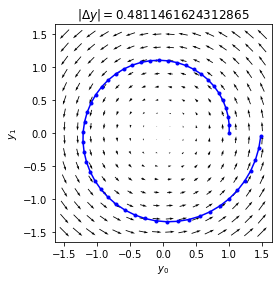

In [3]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
func = lambda x, y: np.array([-2.0 * y[1], 2.0 * y[0]])
x0, x1, y0 = 0.0, np.pi, np.array([1.0, 0.0])

%matplotlib inline
import matplotlib.pyplot as plt
grid = np.linspace(-1.5, 1.5, 16)
qx = [[func(x0, np.array([gx, gy]))[0] for gx in grid] for gy in grid]
qy = [[func(x0, np.array([gx, gy]))[1] for gx in grid] for gy in grid]

xs, ys = euler(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

We can investigate the behaviour of the error of the method by varying the step size $h$. Verify below that the order of Euler's method is $\mathcal{O}(h)$; therefore, it is a first-order method.

In [4]:
ns = [1, 10, 100, 1000, 10000, 100000]
for n in ns:
    xs, ys = euler(func, y0, x0, x1, n)
    print(f'n = {n:6}: |Δy| = {np.linalg.norm(ys[0]-ys[-1]):8.1e}')

n =      1: |Δy| =  6.3e+00
n =     10: |Δy| =  4.5e+00
n =    100: |Δy| =  2.2e-01
n =   1000: |Δy| =  2.0e-02
n =  10000: |Δy| =  2.0e-03
n = 100000: |Δy| =  2.0e-04


### Heun's method

As demonstrated in the figure above, the accuracy of Euler's method is limited. The reason is that the derivative $\boldsymbol{y}'$ is only calculated at the beginning of the step, whereas it is assumed to apply throughout the entire step. Therefore, it cannot account for any changes in $\boldsymbol{y}'$ that may occur over the interval that is integrated over.

A better method can be obtained by first performing a step according to Euler's method based on $\boldsymbol{f}(x,\boldsymbol{y}(x))$, by subsequently calculating the derivative $\boldsymbol{f}(x+h,\boldsymbol{y}(x+h))$ at the estimated end value, and then going back and re-calculating the step size based on the average of these two derivatives. Thus, the above Euler's formula is succeeded by an additional calculation according to

$$
\boldsymbol{y}(x + h) \approx \boldsymbol{y}(x) + \frac{\boldsymbol{f}(\boldsymbol{y}(x), x) + \boldsymbol{f}(\boldsymbol{y}(x+h), x+h)}{2} \cdot h
$$

The resulting algorithm is called [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method), or is also known as the *modified* or *improved Euler's method*. This is an example of a *predictor-corrector* method, since one calculation is used to predict an initial estimation of the step to be taken, and a second calculation provides a more precise correction to that estimate.

**Exercise 2**

Write a function `heun` that integrates a differential equation given by some function $\boldsymbol{f}(x, \boldsymbol{y})$ over the interval from `x0` to `x1` in a given number of steps using Heun's method, starting from a value `y0` that is provided in the form of a `numpy` column vector. The result should be a pairs of lists with all the values of $x_i$ and $\boldsymbol{y}_i$, respectively, with $i$ ranging from zero to the number of steps. What is the order of Heun's method?

In [5]:
def heun(f, y0, x0, x1, steps):
    """xs, ys = heun(f, y0, x0, x1, steps).
    Heun's method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k1 = h * f(x, y)
        k2 = h * f(x + h, y + k1)
        y = y + 0.5 * (k1 + k2)
        ys.append(y)
    return xs, ys

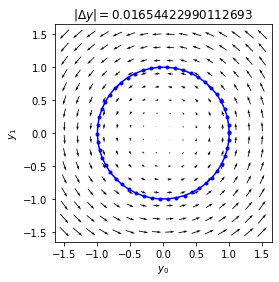

In [6]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
xs, ys = heun(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

In [7]:
ns = [1, 10, 100, 1000, 10000, 100000]
for n in ns:
    xs, ys = heun(func, y0, x0, x1, n)
    print(f'n = {n:6}: |Δy| = {np.linalg.norm(ys[0]-ys[-1]):8.1e}')

n =      1: |Δy| =  2.1e+01
n =     10: |Δy| =  4.5e-01
n =    100: |Δy| =  4.1e-03
n =   1000: |Δy| =  4.1e-05
n =  10000: |Δy| =  4.1e-07
n = 100000: |Δy| =  4.1e-09


### 4th-order Runge-Kutta Method

The idea of using intermediate evaluations of the derivative $\boldsymbol{y}'$ for the integration can be further extended. For example, the [fourth-order Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) evaluates four different derivatives according to the following procedure

$$
\begin{aligned}
\boldsymbol{k}_0 &= h \cdot \boldsymbol{f}(x, \boldsymbol{y}(x))
\\
\boldsymbol{k}_1 &= h \cdot \boldsymbol{f}(x + \frac{1}{2} h, \boldsymbol{y}(x + \frac{1}{2} \boldsymbol{k}_0))
\\
\boldsymbol{k}_2 &= h \cdot \boldsymbol{f}(x + \frac{1}{2} h, \boldsymbol{y}(x + \frac{1}{2} \boldsymbol{k}_1))
\\
\boldsymbol{k}_3 &= h \cdot \boldsymbol{f}(x + h, \boldsymbol{y}(x + \boldsymbol{k}_2))
\end{aligned}
$$

In words:

- $\boldsymbol{k}_0$ evaluates the derivative at the starting point.

- $\boldsymbol{k}_1$ evaluates the derivative after half a step, based on $\boldsymbol{k}_0$.

- $\boldsymbol{k}_2$ again evaluates the derivative after half a step, but now based on the more accurate $\boldsymbol{k}_1$.

- $\boldsymbol{k}_3$ evaluates the derivative at the end of the step, based on $\boldsymbol{k}_2$.

Finally, the value of $\boldsymbol{y}$ is updated according to

$$
\boldsymbol{y}(x + h) \approx \boldsymbol{y}(x) + \frac{\boldsymbol{k}_0 + 2 \boldsymbol{k}_1 + 2 \boldsymbol{k}_2 + \boldsymbol{k}_3}{6}
$$

The various coefficients in this formula have been chosen carefully so that errors cancel each other optimally. The proof of this fact is beyond our scope.

**Exercise 3**

Write a function `runge_kutta` that integrates a differential equation given by some function $\boldsymbol{f}(x, \boldsymbol{y})$ over the interval from `x0` to `x1` in a given number of steps using the 4<sup>th</sup>-order Runge-Kutta method, starting from a value `y0` that is provided in the form of a `numpy` column vector. The result should be a pairs of lists with all the values of $x_i$ and $\boldsymbol{y}_i$, respectively, with $i$ ranging from zero to the number of steps. Verify the order of the Runge-Kutta method.

In [8]:
def runge_kutta(f, y0, x0, x1, steps):
    """xs, ys = runge_kutta(f, y0, x0, x1, steps).
    4th-order Runge-Kutta method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k0 = h * f(x, y)
        k1 = h * f(x + (0.5*h), y + (0.5*k0))
        k2 = h * f(x + (0.5*h), y + (0.5*k1))
        k3 = h * f(x + h, y + k2)
        y = y + (k0 + (2*k1) + (2*k2) + k3)/6
#         print(y)
        ys.append(y)
    return xs, ys

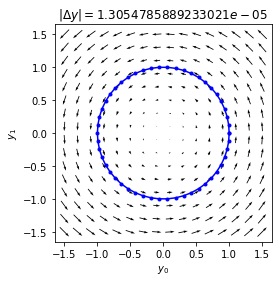

In [9]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
xs, ys = runge_kutta(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

In [10]:
ns = [1, 10, 100, 1000, 10000, 100000]
for n in ns:
    xs, ys = runge_kutta(func, y0, x0, x1, n)
    print(f'n = {n:6}: |Δy| = {np.linalg.norm(ys[0]-ys[-1]):8.1e}')
    
    # Order of magnitude O(h**4)

n =      1: |Δy| =  5.7e+01
n =     10: |Δy| =  8.1e-03
n =    100: |Δy| =  8.2e-07
n =   1000: |Δy| =  8.2e-11
n =  10000: |Δy| =  7.0e-15
n = 100000: |Δy| =  1.6e-14


### The Runge-Kutta Method Family

All of the above algorithms form special cases in a more general [Runge-Kutta family of methods](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods) that calculate any number of intermediate derivatives according to the following equations

$$
\begin{aligned}
\boldsymbol{k}_0 &= h \cdot \boldsymbol{f}(x, \boldsymbol{y}(x))
\\
\boldsymbol{k}_1 &= h \cdot \boldsymbol{f}(x + q_{1,0} \cdot h, \boldsymbol{y}(x) + q_{1,0} \cdot \boldsymbol{k}_0)
\\
\boldsymbol{k}_2 &= h \cdot \boldsymbol{f}(x + (q_{2,0} + q_{2,1}) \cdot h, \boldsymbol{y}(x) + q_{2,0} \cdot \boldsymbol{k}_0 + q_{2,1} \cdot \boldsymbol{k}_1)
\\
\vdots
\\
\boldsymbol{k}_n &= h \cdot \boldsymbol{f}(x + \sum_{m=0}^{n-1} q_{nm} \cdot h, \boldsymbol{y}(x) + \sum_{m=0}^{n-1} q_{nm} \cdot \boldsymbol{k}_m)
\end{aligned}
$$

followed by a final single step

$$
\boldsymbol{y}(x + h) = \boldsymbol{y}(x) + \sum_{m=0}^{n} c_m \cdot \boldsymbol{k}_m
$$

The coefficients of many such methods can be found in reference books or online; some of the more important examples are listed below in the form of Butcher tables. Verify that the listed coefficients for the Euler's, Heun's and Runge-Kutta methods all describe the formulas that were given earlier.

| Method | Order | $\boldsymbol{c}$ | $\boldsymbol{q}$ |
| - | - | - | - |
| Euler's | 1 | $1$ | $\times$ |
| Heun's | 2 | $\frac{1}{2}$, $\frac{1}{2}$ | $1$ |
| Midpoint | 2 | $0$, $1$ | $\frac{1}{2}$ |
| SSPRK3 | 3 | $\frac{1}{6}$, $\frac{1}{6}$, $\frac{2}{3}$ | $\begin{array}{cc} 1 & \\ \frac{1}{4} & \frac{1}{4} \end{array}$ |
| Kutta's | 3 | $\frac{1}{6}$, $\frac{2}{3}$, $\frac{1}{6}$ | $\begin{array}{cc} \frac{1}{2} & \\ -1 & 2 \end{array}$ |
| Runge-Kutta's | 4 | $\frac{1}{6}$, $\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{6}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ 0 & \frac{1}{2} & \\ 0 & 0 & 1 \end{array}$ |
| 3/8-rule | 4 | $\frac{1}{8}$, $\frac{3}{8}$, $\frac{3}{8}$, $\frac{1}{8}$ | $\begin{array}{ccc} \frac{1}{3} & & \\ -\frac{1}{3} & 1 & \\ 1 & -1 & 1 \end{array}$ |
| SSPRK4 | 4 | $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{2}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ \frac{1}{2} & \frac{1}{2} & \\ \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \end{array}$ |
| Butcher's | 5 | $\frac{7}{90}$, $0$, $\frac{32}{90}$, $\frac{12}{90}$, $\frac{32}{90}$, $\frac{7}{90}$ | $\begin{array}{ccccc} \frac{1}{4} & & & & \\ \frac{1}{8} & \frac{1}{8} & & & \\ 0 & -\frac{1}{2} & 1 & & \\ \frac{3}{16} & 0 & 0 & \frac{9}{16} & \\ -\frac{3}{7} & \frac{2}{7} & \frac{12}{7} & -\frac{12}{7} & \frac{8}{7} \end{array}$ |

Third-order methods are not popular in computer application. Most programmers prefer integration formulas of order four, which achieve a given accuracy with less computational effort. The Runge-Kutta method is popular in particular because it combines an adequate accuracy (being of order 4) with a relative simplicity (because several $q_{nm}$ equal zero).

**Exercise 4**

Try to understand the *midpoint method* on the basis of the coefficients in the table. Phrase in your own words what it does. Does the method make intuitive sense?

In [11]:
def midpoint_method(f, y0, x0, x1, steps):
    """xs, ys = my_method(f, y0, x0, x1, steps).
    My own method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k1 = h * f(x, y)
        k2 = h * f(x + (0.5*h), y + (0.5*k1))
        y = y + k2
        ys.append(y)
    return xs, ys

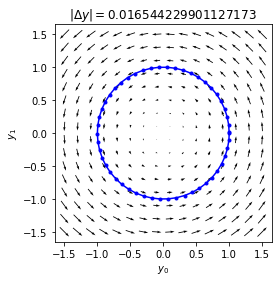

n =      1: |Δy| =  2.1e+01
n =     10: |Δy| =  4.5e-01
n =    100: |Δy| =  4.1e-03
n =   1000: |Δy| =  4.1e-05
n =  10000: |Δy| =  4.1e-07
n = 100000: |Δy| =  4.1e-09


In [12]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
xs, ys = midpoint_method(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()
plt.show()

ns = [1, 10, 100, 1000, 10000, 100000]
for n in ns:
    xs, ys = midpoint_method(func, y0, x0, x1, n)
    print(f'n = {n:6}: |Δy| = {np.linalg.norm(ys[0]-ys[-1]):8.1e}')

In [ ]:
# def my_SSPRK3(f, y0, x0, x1, steps):
#     """xs, ys = my_method(f, y0, x0, x1, steps).
#     My own method for solving the
#     initial value problem {y}' = {f(x,{y})},
#     where {y} = {y[0],y[1],...,y[n-1]}.
#     x0, y0 = initial conditions
#     x1     = terminal value of x
#     steps  = number of integration steps
#     f      = user-supplied function that returns the
#              array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
#     """
#     h = (x1 - x0) / steps
#     xs = np.linspace(x0, x1, steps + 1)
#     y = y0
#     ys = [y]
#     for x in xs[:-1]:
#         k1 = h * f(x, y)
#         k2 = h * f(x + (1/8)*h, y + (k1/3))
#         k3 = h * f(x + ((2*h)/3), y - (k1/3) + k2)
#         k4 = h * f(x + h, y + k1 - k2 +k3)
#         y = y + (k1 + (3*k2) + (3*k3) + k3)/8
#         ys.append(y)
#     return xs, ys

**Exercise 5**

Pick one of the methods from the above table that has not been implemented yet. Write a function `my_method` that integrates a differential equation given by some function $\boldsymbol{f}(x, \boldsymbol{y})$ over the interval from `x0` to `x1` in a given number of steps using that method, starting from a value `y0` that is provided in the form of a `numpy` column vector. The result should be a pairs of lists with all the values of $x_i$ and $\boldsymbol{y}_i$, respectively, with $i$ ranging from zero to the number of steps. Verify the order of your method.

In [13]:
def my_3_8_rule(f, y0, x0, x1, steps):
    """xs, ys = my_method(f, y0, x0, x1, steps).
    My own method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k1 = h * f(x, y)
        k2 = h * f(x + (h/3), y + (k1/3))
        k3 = h * f(x + ((2*h)/3), y - (k1/3) + k2)
        k4 = h * f(x + h, y + k1 - k2 + k3)
        y = y + (k1 + (3*k2) + (3*k3) + k4)/8
        ys.append(y)
    return xs, ys

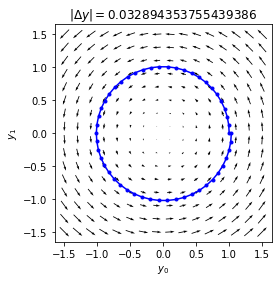

In [14]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
x0, x1, y0 = 0.0, np.pi, np.array([1.0, 0.0])
xs, ys = my_3_8_rule(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

In [15]:
ns = [1, 10, 100, 1000, 10000, 100000]
for n in ns:
    xs, ys = my_3_8_rule(func, y0, x0, x1, n)
    print(f'n = {n:6}: |Δy| = {np.linalg.norm(ys[0]-ys[-1]):8.1e}')

n =      1: |Δy| =  3.9e+01
n =     10: |Δy| =  1.0e-01
n =    100: |Δy| =  1.7e-02
n =   1000: |Δy| =  1.6e-03
n =  10000: |Δy| =  1.6e-04
n = 100000: |Δy| =  1.6e-05


In [16]:
def my_ralston(f, y0, x0, x1, steps):
    """xs, ys = my_method(f, y0, x0, x1, steps).
    My own method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k1 = h * f(x, y)
        k2 = h * f(x + (2/3)*h, y + (2/3)*k1)
        y = y + (k1 + (3*k2))/4
        ys.append(y)
    return xs, ys

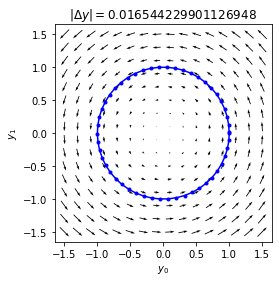

In [17]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
import numpy as np
x0, x1, y0 = 0.0, np.pi, np.array([1.0, 0.0])
xs, ys = my_ralston(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

In [19]:
def my_butchers(f, y0, x0, x1, steps):
    """xs, ys = runge_kutta(f, y0, x0, x1, steps).
    4th-order Runge-Kutta method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        k1 = h * f(x, y)
        k2 = h * f(x + (1/4)*h, y + (1/4)*k1)
        k3 = h * f(x + (1/4)*h, y + (1/8)*k1 + (1/8)*k2)
        k4 = h * f(x + (1/2)*h, y - (1/2)*k2 + k3)
        k5 = h * f(x + (3/4)*h, y + (3/16)*k1 + (9/16)*k4)
        k6 = h * f(x + h, y - (3/7)*k1 + (2/7)*k2 + (12/7)*k3 - (12/7)*k4 + (8/7)*k5)
        y = y + (7*k1 + 32*k3 + 12*k4 +32*k5 + 7*k6)/90
        ys.append(y)
    return xs, ys

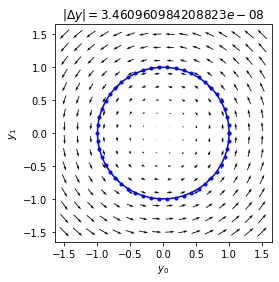

In [20]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
import numpy as np
x0, x1, y0 = 0.0, np.pi, np.array([1.0, 0.0])
xs, ys = my_butchers(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

### Exercises

**Exercise 6**

Solve the differential equation $y' = 3y - 4e^{-x}$ with initial value $y(0) = 1$ numerically from $x=0$ to $4$ in steps of $h=0.01$. Compare the result with the exact analytical solution $y = e^{-x}$.

Does it make a visible difference which solver you use? Can you understand what is happening? (See also example 7.5 in the book.)

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np

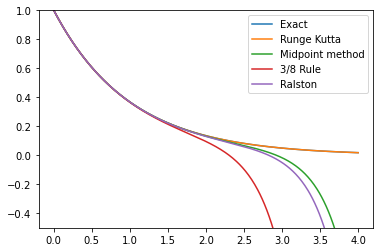

In [24]:
# Example: Solve {y}' = {-2*y1, 2*y0} with y(0) = {1, 0}
f = lambda z : np.exp(-z)
func = lambda x, y : np.array([3*y[0] - 4*np.exp(-x)])

x0, x1, y0 = 0.0, 4.0, np.array([1.0, 0.0])
z = np.linspace(0.0, 4.0, 101)

plt.plot(z, f(z), label='Exact')

x_1, y_1 = runge_kutta(func, y0, x0, x1, 400)
plt.plot(x_1, [i[0] for i in y_1], label='Runge Kutta')

x_2, y_2 = midpoint_method(func, y0, x0, x1, 400)
plt.plot(x_2, [i[0] for i in y_2], label='Midpoint method')

x_3, y_3 = my_3_8_rule(func, y0, x0, x1, 400)
plt.plot(x_3, [i[0] for i in y_3], label='3/8 Rule')

x_4, y_4 = my_ralston(func, y0, x0, x1, 400)
plt.plot(x_4, [i[0] for i in y_4], label='Ralston')

plt.legend()
plt.ylim(-0.5, 1.0)
plt.show()

## Reason for error
The error is caused by something called "numerical instability" which happens due to small errors that increase when the function proceeds.

"We now see that the term containing the error ε becomes dominant as x is increased.
Because errors inherent in the numerical solution have the same effect as small
changes in initial conditions, we conclude that our numerical solution is the victim
of numerical instability due to sensitivity of the solution to initial conditions. The
lesson is not to blindly trust the results of numerical integration."

**Exercise 7**

The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations

$$
\begin{aligned}
\frac{dx}{dt} &= \alpha \cdot x - \beta \cdot x y
\\
\frac{dy}{dt} &= \delta \cdot x y - \gamma \cdot y
\end{aligned}
$$

Plot the population dynamics for $\alpha = \frac{2}{3}$, $\beta = \frac{4}{3}$, $\delta = \gamma = 1$, and initial conditions $x = y = \frac{3}{2}$.

In [18]:
alpha = 2/3
beta = 4/3
theta = epsilon = 1

x = [3/2, 3/2]

LV = lambda t, x: np.array([alpha*x[0] - beta*x[0]*x[1],
                            theta*x[0]*x[1] - epsilon*x[1]])

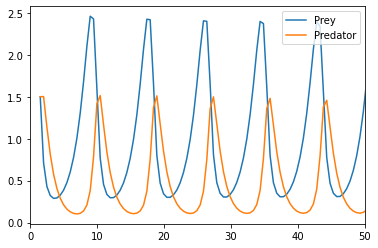

In [22]:
import numpy as np
import matplotlib.pyplot as plt

ts, vs = midpoint_method(LV, np.array([3/2, 3/2]), 3/2, 300.0, 600)
v0 = [v[0] for v in vs]
v1 = [v[1] for v in vs]

plt.plot(ts, v0, label='Prey')
plt.plot(ts, v1, label='Predator')
plt.xlim(0, 50)
plt.legend()
plt.show()


**Exercise 8**

The [Bessel function $J_0$](https://en.wikipedia.org/wiki/Bessel_function) is given by the 2<sup>nd</sup>-order differential equation

$$
J_0'' + \frac{1}{x} \cdot J_0' + J_0 = 0
$$

with initial values $J_0(0) = 1$ and $J_0'(0) = 0$. How many zeroes does this function have in the range $x = 0$ to $25$?

(Hint: To avoid the singularity at $x = 0$, start the integration at $x = 10^{-12}$.)

An ordinary differential equation of arbitrary order $n$ can be written as $y^{(n)} = f(x, y, y', \ldots, y^{(n−1)})$. This can always be transformed into $n$ first-order equations. Using the notation $y_0 = y, y_1 = y', y_2 = y'', \ldots, y_{n−1} = y^{(n−1)}$, the equivalent first-order equations are $y_0' = y_1, y_1' = y_2, y_2' = y_3, \ldots, y_n' = f(x, y_0, y_1, \ldots, y_{n−1})$.

$$
y_0'' + \frac{1}{x} \cdot y_0' + y_0 = 0
$$
$$
y_2 + \frac{1}{x} \cdot y_1 + y_0 = 0
$$
$$
y_1 = y'
$$
$$
y_2 =  -(\frac{1}{x} \cdot y_1 + y_0)
$$



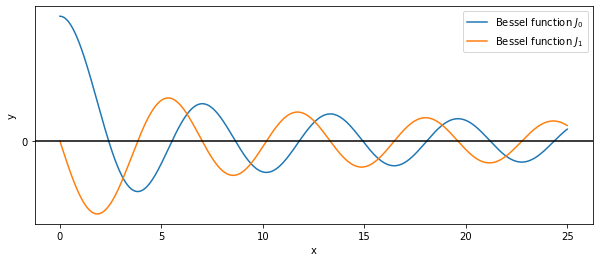

In [23]:
def Bessel(t, v):
    y0,y1 = v[0],v[1]
    return np.array([y1, -(1/t*y1+y0)])

y0 = [1, 0]
x0 = 1e-12
x1 = 25
xs,ys = runge_kutta(Bessel, y0, x0, x1, int(1e5))
plt.figure(figsize=(10, 4))
plt.plot(xs, [y[0] for y in ys],label = 'Bessel function $J_0$')
plt.plot(xs, [y[1] for y in ys],label = 'Bessel function $J_1$')
plt.axhline("0",color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

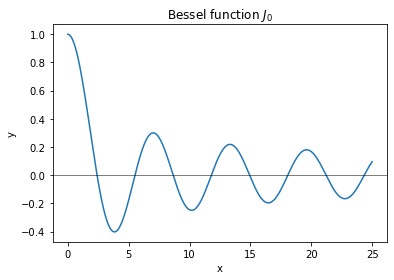

In [24]:
from scipy.special import jv
xi = np.linspace(0, 25, 1000)
yi = jv(0, xi)
plt.plot(xi, yi)
plt.title('Bessel function $J_0$')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0.0, color='black', lw=0.5)
plt.show()

***